In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("twitter_training.csv")
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
missing_train = train_data.isnull().sum()

In [ ]:
duplicates_train = train_data.duplicated().sum()

In [ ]:
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()

In [ ]:
unique_entities_train = train_data.iloc[:, 1].nunique()

In [ ]:
train_data_cleaned = train_data.drop_duplicates()

In [ ]:
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

In [ ]:
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

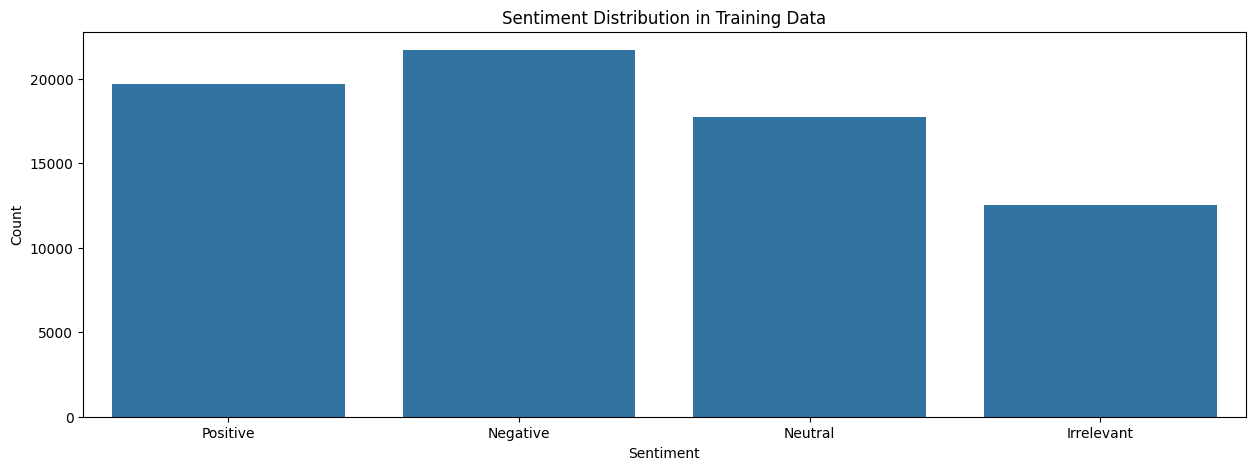

In [ ]:
# Plotting the data separately
# Set up the plot for sentiment distribution
plt.figure(figsize=(15, 5))
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Sentiment Distribution in Training Data')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()





<ipython-input-72-72337b9e723b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')


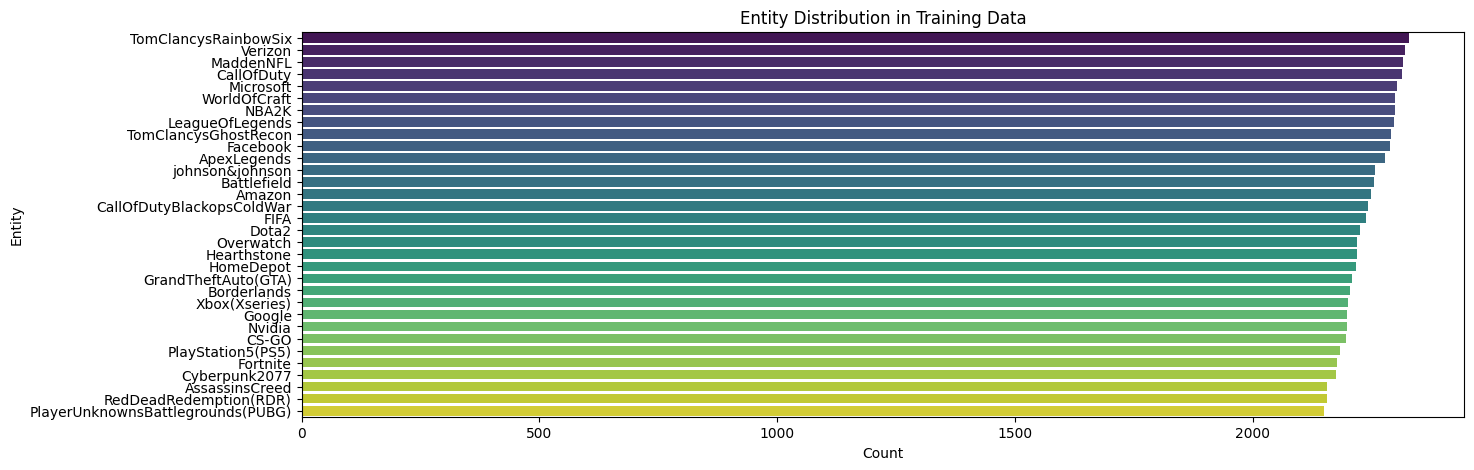

In [ ]:
# Set up the plot for entity distribution
plt.figure(figsize=(15, 5))
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()


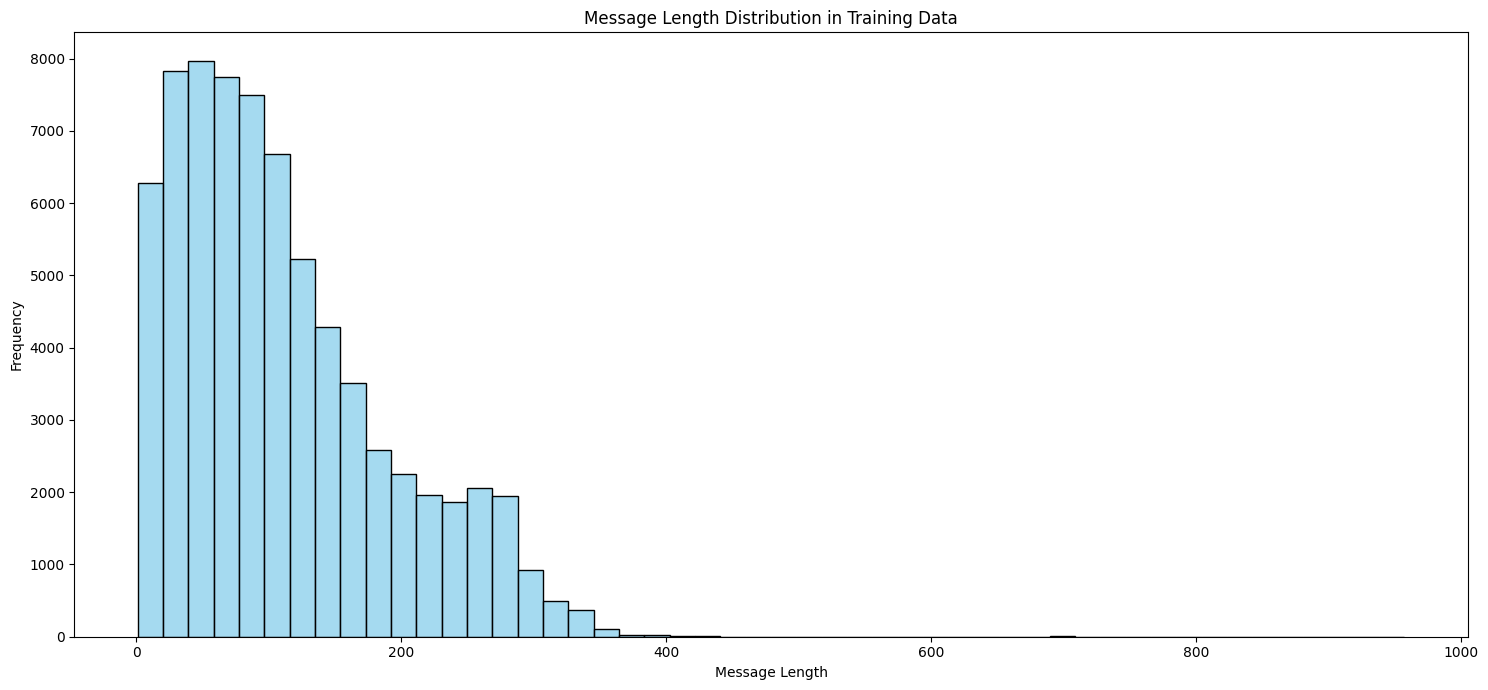

In [ ]:
plt.figure(figsize=(15, 7))

# Calculate the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)

# Plot message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, color='skyblue')
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.tight_layout()
plt.show()

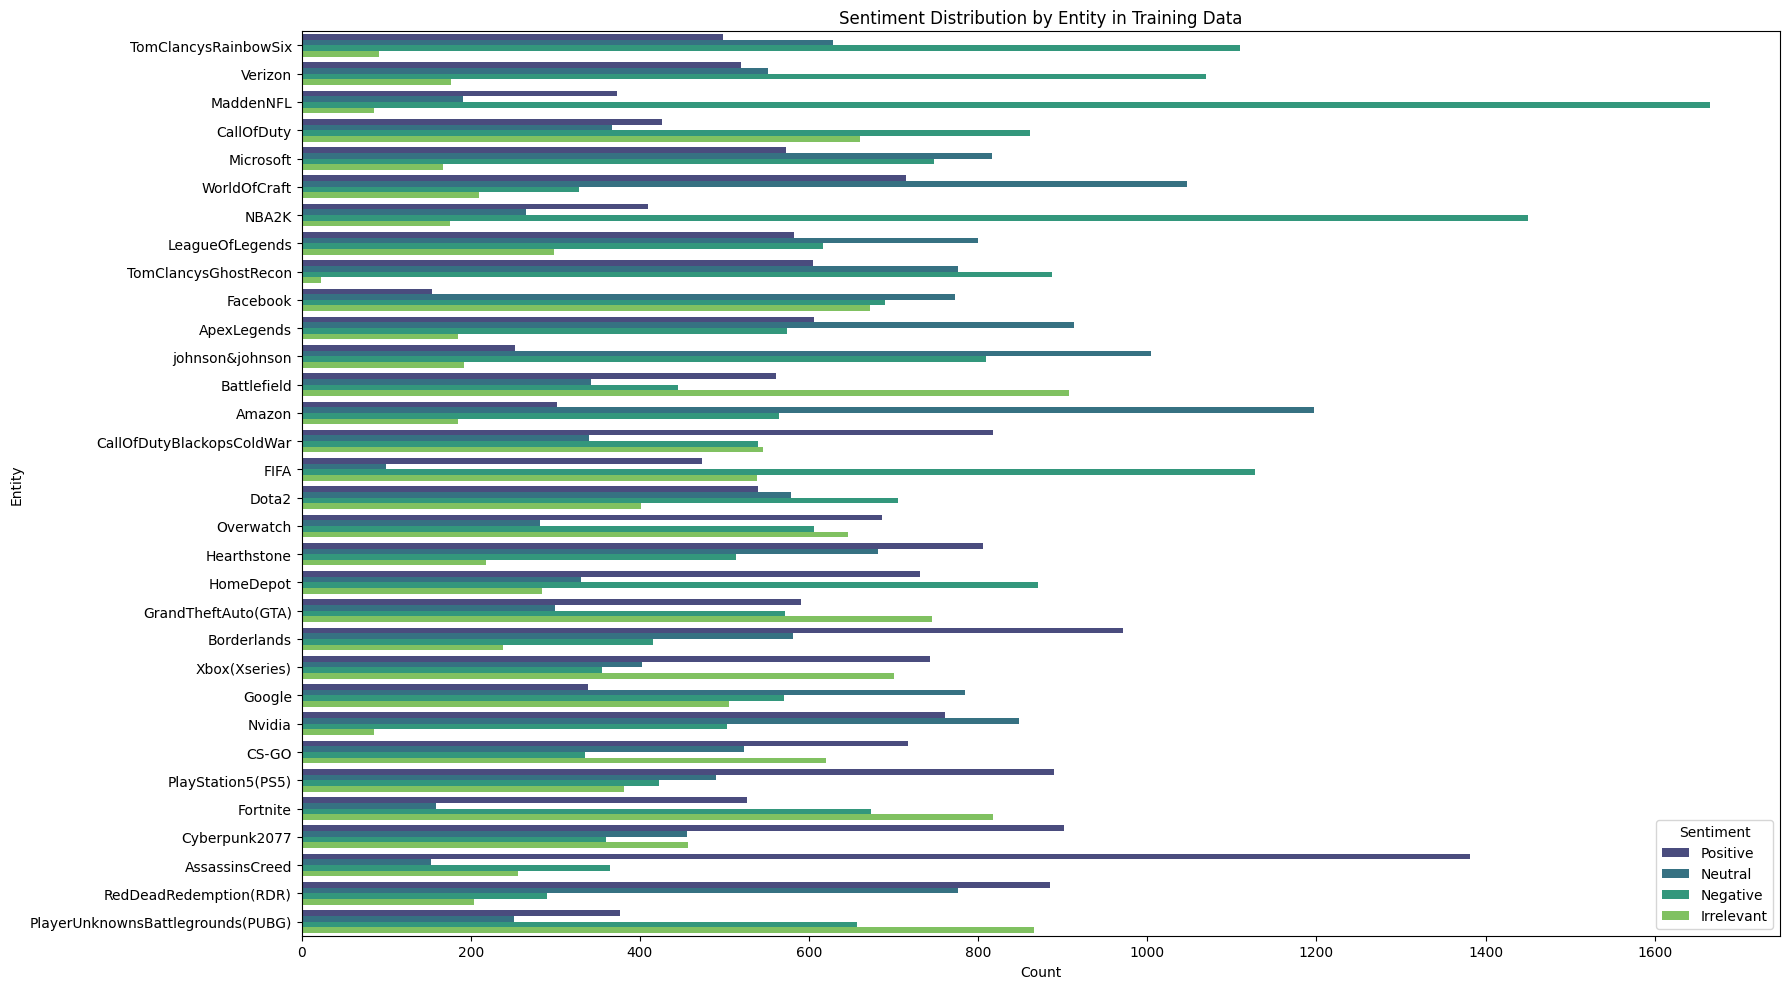

In [ ]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], hue=train_data_cleaned.columns[2], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<ipython-input-76-c6fdddc8b7aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


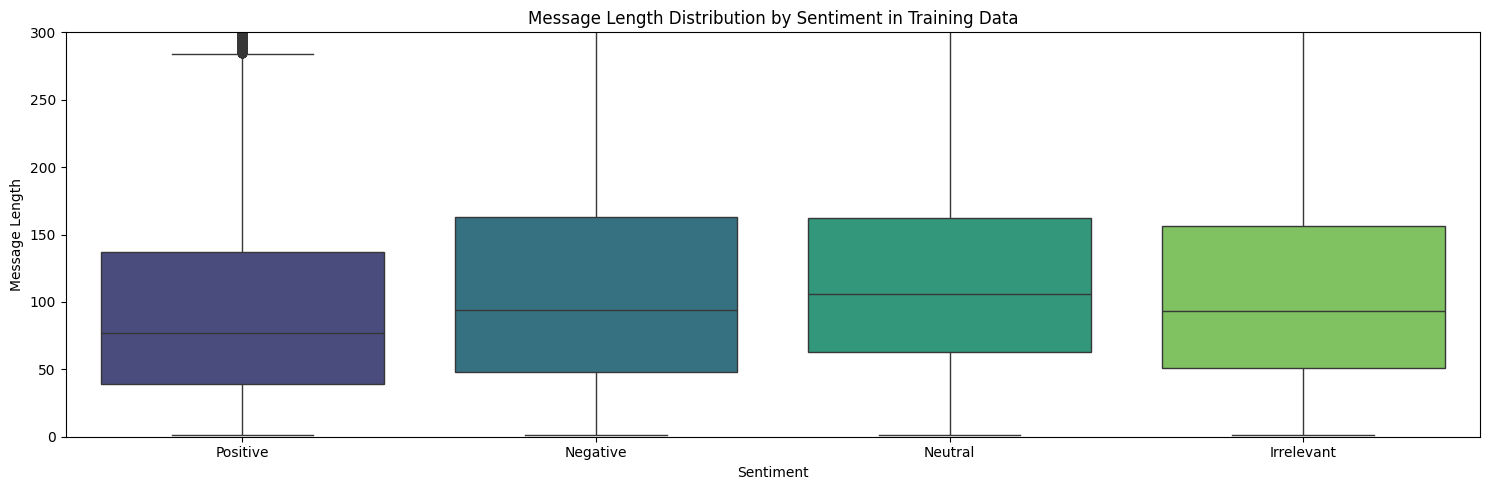

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0, 300)

plt.tight_layout()
plt.show()